In [1]:
import itertools
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("datasets/airline-passengers.csv", index_col='month', parse_dates=True)

df[["total_passengers"]].plot(title="Passengers Data")
plt.show()

In [11]:
#Verinin aylık veri olduğu bilgisi eklenebilir.

df.index.freq="MS"
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='month', length=144, freq='MS')

In [12]:
train = df[:120]
test = df[120:]

In [18]:
def plot_prediction(y_pred, label):
    train["total_passengers"].plot(legend=True, label="Train")
    test["total_passengers"].plot(legend=True, label="TEST")
    y_pred.plot(legend=True, label="PREDICTION")
    plt.title("Train, Test and Predicted Test Using"+label)
    plt.show()

##### Single Exponential Smoothing

In [16]:
def ses_optimizer(train, alphas, step):
    best_alpha, best_mae = None, float("inf")
    for alpha in alphas:
        ses_model = SimpleExpSmoothing(train).fit(smoothing_level=alpha)
        y_pred = ses_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)
        if mae < best_mae:
            best_alpha, best_mae = alpha, mae
        print("alpha:", round(alpha, 2), "mae:", round(mae, 4))
    print("best_alpha:", round(best_alpha, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_mae

In [17]:
alphas = np.arange(0.01, 1, 0.1)
best_alpha, best_mae = ses_optimizer(train, alphas, step=24)

alpha: 0.01 mae: 225.5863
alpha: 0.11 mae: 82.528
alpha: 0.21 mae: 82.8979
alpha: 0.31 mae: 89.8377
alpha: 0.41 mae: 99.0585
alpha: 0.51 mae: 107.5558
alpha: 0.61 mae: 113.7514
alpha: 0.71 mae: 117.2224
alpha: 0.81 mae: 118.1776
alpha: 0.91 mae: 117.2438
best_alpha: 0.11 best_mae: 82.528


In [21]:
ses_model = SimpleExpSmoothing(train).fit(smoothing_level=best_alpha)
y_pred = ses_model.forecast(24)

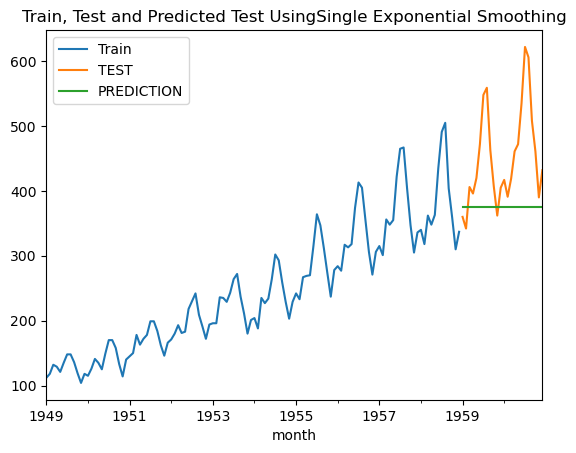

In [22]:
plot_prediction(y_pred, "Single Exponential Smoothing")

##### Double Exponential Smoothing

In [23]:
def des_optimizer(train, alphas, betas, step):
    best_alpha, best_beta, best_mae = None, None, float("inf")
    for alpha in alphas:
        for beta in betas:
            des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=alpha, smoothing_slope=beta)
            y_pred = des_model.forecast(step)
            mae = mean_absolute_error(test, y_pred)
            if mae < best_mae:
                best_alpha, best_beta, best_mae = alpha, beta, mae
            print("alpha:", round(alpha, 2), "beta:", round(beta, 2), "mae:", round(mae, 4))
    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_beta, best_mae

In [25]:
alphas = np.arange(0.01, 1, 0.10)
betas = np.arange(0.01, 1, 0.10)

best_alpha, best_beta, best_mae = des_optimizer(train, alphas, betas, step=24)

alpha: 0.01 beta: 0.01 mae: 54.9512
alpha: 0.01 beta: 0.11 mae: 54.1036
alpha: 0.01 beta: 0.21 mae: 55.5568
alpha: 0.01 beta: 0.31 mae: 57.3247
alpha: 0.01 beta: 0.41 mae: 57.7931
alpha: 0.01 beta: 0.51 mae: 57.9968
alpha: 0.01 beta: 0.61 mae: 57.9636
alpha: 0.01 beta: 0.71 mae: 57.5635
alpha: 0.01 beta: 0.81 mae: 57.3334
alpha: 0.01 beta: 0.91 mae: 57.8984
alpha: 0.11 beta: 0.01 mae: 55.0309
alpha: 0.11 beta: 0.11 mae: 58.4728
alpha: 0.11 beta: 0.21 mae: 69.6339
alpha: 0.11 beta: 0.31 mae: 72.555
alpha: 0.11 beta: 0.41 mae: 78.8168
alpha: 0.11 beta: 0.51 mae: 81.996
alpha: 0.11 beta: 0.61 mae: 77.2262
alpha: 0.11 beta: 0.71 mae: 71.5042
alpha: 0.11 beta: 0.81 mae: 69.0258
alpha: 0.11 beta: 0.91 mae: 67.8408
alpha: 0.21 beta: 0.01 mae: 57.1824
alpha: 0.21 beta: 0.11 mae: 74.992
alpha: 0.21 beta: 0.21 mae: 95.9492
alpha: 0.21 beta: 0.31 mae: 115.3164
alpha: 0.21 beta: 0.41 mae: 139.4303
alpha: 0.21 beta: 0.51 mae: 178.3759
alpha: 0.21 beta: 0.61 mae: 243.4543
alpha: 0.21 beta: 0.71 mae:

In [26]:
des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=best_alpha, smoothing_slope=best_beta)
y_pred = des_model.forecast(24)

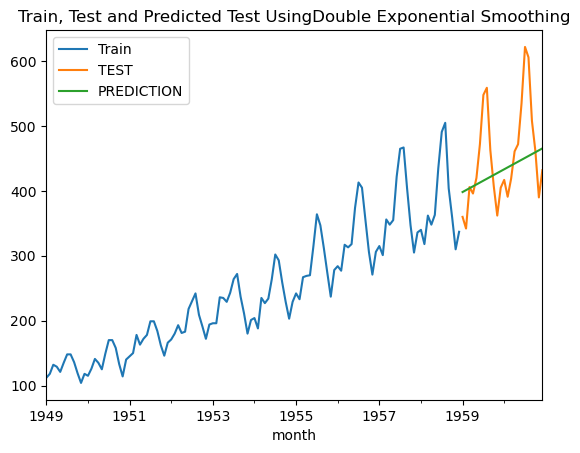

In [28]:
plot_prediction(y_pred, "Double Exponential Smoothing")

##### Trible Exponential Smoothing

In [30]:
alphas = betas = gammas = np.arange(0.20, 1, 0.10)

abg = list(itertools.product(alphas, betas, gammas)) #tüm kombinasyonlar tuple formatında bir listenin içindedir.

In [32]:
def tes_optimizer(train, abg, step):
    best_alpha, best_beta, best_gamma, best_mae = None, None, None, float("inf")
    for comb in abg:
        tes_model = ExponentialSmoothing(train,trend="add",seasonal="add",
                                         seasonal_periods=12).fit(smoothing_level=comb[0],
                                                                  smoothing_trend=comb[1],
                                                                  smoothing_seasonal=comb[2])
        y_pred = tes_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)
        
        if mae < best_mae:
            best_alpha, best_beta, best_gamma, best_mae = comb[0], comb[1], comb[2], mae
        print([round(comb[0], 2), round(comb[1], 2), round(comb[2], 2), round(mae, 2)])
    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_gamma:", round(best_gamma, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_beta, best_gamma, best_mae

best_alpha, best_beta, best_gamma, best_mae = tes_optimizer(train, abg, step=24)

[0.2, 0.2, 0.2, 45.41]
[0.2, 0.2, 0.3, 40.47]
[0.2, 0.2, 0.4, 38.59]
[0.2, 0.2, 0.5, 38.18]
[0.2, 0.2, 0.6, 37.75]
[0.2, 0.2, 0.7, 36.46]
[0.2, 0.2, 0.8, 34.27]
[0.2, 0.2, 0.9, 31.53]
[0.2, 0.3, 0.2, 36.9]
[0.2, 0.3, 0.3, 29.13]
[0.2, 0.3, 0.4, 25.91]
[0.2, 0.3, 0.5, 24.4]
[0.2, 0.3, 0.6, 21.8]
[0.2, 0.3, 0.7, 16.81]
[0.2, 0.3, 0.8, 11.14]
[0.2, 0.3, 0.9, 11.28]
[0.2, 0.4, 0.2, 23.34]
[0.2, 0.4, 0.3, 15.61]
[0.2, 0.4, 0.4, 11.68]
[0.2, 0.4, 0.5, 9.81]
[0.2, 0.4, 0.6, 9.65]
[0.2, 0.4, 0.7, 15.66]
[0.2, 0.4, 0.8, 19.55]
[0.2, 0.4, 0.9, 14.15]
[0.2, 0.5, 0.2, 23.61]
[0.2, 0.5, 0.3, 25.01]
[0.2, 0.5, 0.4, 21.11]
[0.2, 0.5, 0.5, 17.67]
[0.2, 0.5, 0.6, 18.15]
[0.2, 0.5, 0.7, 16.49]
[0.2, 0.5, 0.8, 10.08]
[0.2, 0.5, 0.9, 10.02]
[0.2, 0.6, 0.2, 36.49]
[0.2, 0.6, 0.3, 43.78]
[0.2, 0.6, 0.4, 29.92]
[0.2, 0.6, 0.5, 15.7]
[0.2, 0.6, 0.6, 8.71]
[0.2, 0.6, 0.7, 10.11]
[0.2, 0.6, 0.8, 17.0]
[0.2, 0.6, 0.9, 25.5]
[0.2, 0.7, 0.2, 48.01]
[0.2, 0.7, 0.3, 56.28]
[0.2, 0.7, 0.4, 26.85]
[0.2, 0.7, 0.5, 10.1

In [34]:
tes_model = ExponentialSmoothing(train,
                                trend="add",
                                seasonal="add",
                                seasonal_periods=12).fit(smoothing_level=best_alpha,
                                                        smoothing_trend=best_beta,
                                                        smoothing_seasonal=best_gamma)
y_pred = tes_model.forecast(24)

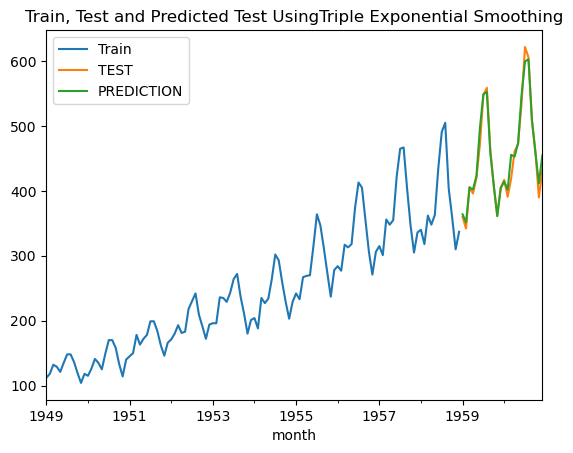

In [35]:
plot_prediction(y_pred, "Triple Exponential Smoothing")

##### ARIMA(p, d, q): Autoregressive Integrated Moving Average

In [36]:
p=d=q=range(0, 4)
pdq = list(itertools.product(p, d, q))

In [37]:
def arima_optimizer_aic(train, orders):
    best_aic, best_params = float("inf"), None
    for order in orders:
        try:
            arima_model_result = ARIMA(train, order=order).fit()
            aic = arima_model_result.aic
            if aic < best_aic:
                best_aic, best_params = aic, order
            print('ARIMA%s AIC=%.2f' % (order, aic))
        except:
            continue
    print('Best ARIMA%s AIC=%.2f' %(best_params, best_aic))
        
    return best_params   

In [38]:
best_params_aic = arima_optimizer_aic(train, pdq)

ARIMA(0, 0, 0) AIC=1436.33
ARIMA(0, 0, 1) AIC=1295.42
ARIMA(0, 0, 2) AIC=1229.22
ARIMA(0, 0, 3) AIC=1169.78
ARIMA(0, 1, 0) AIC=1138.81
ARIMA(0, 1, 1) AIC=1127.02
ARIMA(0, 1, 2) AIC=1126.97
ARIMA(0, 1, 3) AIC=1125.45
ARIMA(0, 2, 0) AIC=1171.65
ARIMA(0, 2, 1) AIC=1136.52
ARIMA(0, 2, 2) AIC=1124.36
ARIMA(0, 2, 3) AIC=1124.57
ARIMA(0, 3, 0) AIC=1263.95
ARIMA(0, 3, 1) AIC=1169.49
ARIMA(0, 3, 2) AIC=1140.39
ARIMA(0, 3, 3) AIC=1127.31
ARIMA(1, 0, 0) AIC=1152.40
ARIMA(1, 0, 1) AIC=1138.85
ARIMA(1, 0, 2) AIC=1140.24
ARIMA(1, 0, 3) AIC=1142.18
ARIMA(1, 1, 0) AIC=1130.66
ARIMA(1, 1, 1) AIC=1125.43
ARIMA(1, 1, 2) AIC=1118.10
ARIMA(1, 1, 3) AIC=1119.79
ARIMA(1, 2, 0) AIC=1168.21
ARIMA(1, 2, 1) AIC=1127.97
ARIMA(1, 2, 2) AIC=1122.89
ARIMA(1, 2, 3) AIC=1123.66
ARIMA(1, 3, 0) AIC=1232.81
ARIMA(1, 3, 1) AIC=1166.48
ARIMA(1, 3, 2) AIC=1170.58
ARIMA(1, 3, 3) AIC=1130.67
ARIMA(2, 0, 0) AIC=1141.99
ARIMA(2, 0, 1) AIC=1138.37
ARIMA(2, 0, 2) AIC=1138.68
ARIMA(2, 0, 3) AIC=1135.89
ARIMA(2, 1, 0) AIC=1126.84
A

In [42]:
arima_model_final = ARIMA(train, order=(2, 1, 3)).fit()
y_pred = arima_model_final.forecast(24)
mean_absolute_error(test, y_pred)

82.16562280019

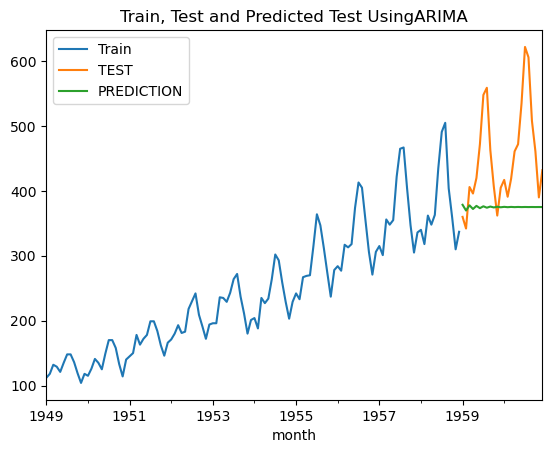

In [43]:
plot_prediction(y_pred, "ARIMA")

##### SARIMA(p, d, q): Seasonal Autoregressive Integrated Moving Average

In [44]:
p=d=q=range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [45]:
def sarima_optimizer_aic(train, pdq, seasonal_pdq):
    best_aic, best_order, best_seasonal_order = float("inf"), None, None
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                sarima_model= SARIMAX(train, order=param,
                                     seasonal_order=param_seasonal)
                results = sarima_model.fit()
                aic = results.aic
                if aic < best_aic:
                    best_aic, best_order, best_seasonal_order = aic, param, param_seasonal
                print(f'SARIMA{param}x{param_seasonal}12-AIC={aic}')
            except:
                continue
    print(f'SARIMA{best_order}x{best_seasonal_order}12-AIC={best_aic}')
        
    return best_order, best_seasonal_order  

In [46]:
best_order, best_seasonal_order = sarima_optimizer_aic(train, pdq, seasonal_pdq)

SARIMA(0, 0, 0)x(0, 0, 0, 12)12-AIC=1680.2792351899682
SARIMA(0, 0, 0)x(0, 0, 1, 12)12-AIC=1557.6320580403953
SARIMA(0, 0, 0)x(0, 1, 0, 12)12-AIC=1060.4792883429307
SARIMA(0, 0, 0)x(0, 1, 1, 12)12-AIC=1014.0696747520246
SARIMA(0, 0, 0)x(1, 0, 0, 12)12-AIC=1231.986585370534
SARIMA(0, 0, 0)x(1, 0, 1, 12)12-AIC=1185.3010979092264
SARIMA(0, 0, 0)x(1, 1, 0, 12)12-AIC=969.3781382611477
SARIMA(0, 0, 0)x(1, 1, 1, 12)12-AIC=951.6232719063515
SARIMA(0, 0, 1)x(0, 0, 0, 12)12-AIC=1524.3620853404027
SARIMA(0, 0, 1)x(0, 0, 1, 12)12-AIC=1403.5942349704512
SARIMA(0, 0, 1)x(0, 1, 0, 12)12-AIC=967.5225695584568
SARIMA(0, 0, 1)x(0, 1, 1, 12)12-AIC=942.2425093047342
SARIMA(0, 0, 1)x(1, 0, 0, 12)12-AIC=1136.4998829615665
SARIMA(0, 0, 1)x(1, 0, 1, 12)12-AIC=1127.839720614027
SARIMA(0, 0, 1)x(1, 1, 0, 12)12-AIC=918.2233876023897
SARIMA(0, 0, 1)x(1, 1, 1, 12)12-AIC=896.7081249533768
SARIMA(0, 1, 0)x(0, 0, 0, 12)12-AIC=1138.8088994229304
SARIMA(0, 1, 0)x(0, 0, 1, 12)12-AIC=1049.4242820841835
SARIMA(0, 1, 0)x(0

In [47]:
model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
sarima_final_model = model.fit()

In [49]:
y_pred_test = sarima_final_model.get_forecast(steps=24)
y_pred = y_pred_test.predicted_mean
y_pred = pd.Series(y_pred, index=test.index)
mean_absolute_error(test, y_pred)

68.57726547031133

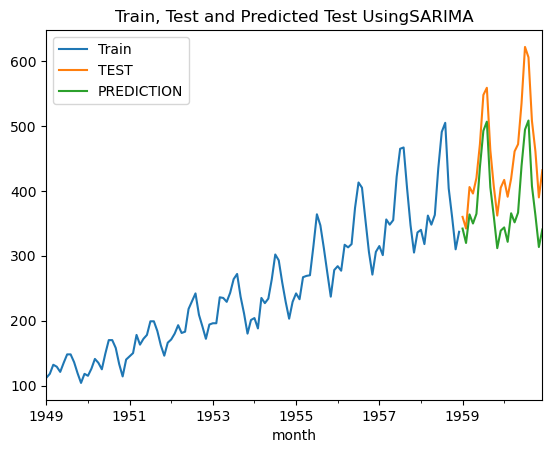

In [50]:
plot_prediction(y_pred, "SARIMA")

In [53]:
def sarima_optimizer_mae(train, pdq, seasonal_pdq):
    best_mae, best_order, best_seasonal_order = float("inf"), None, None
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                sarima_model= SARIMAX(train, order=param,
                                     seasonal_order=param_seasonal).fit()
                y_pred_test = sarima_model.get_forecast(steps=24)
                y_pred = y_pred_test.predicted_mean
                mae = mean_absolute_error(test, y_pred)
                if mae < best_mae:
                    best_mae, best_order, best_seasonal_order = mae, param, param_seasonal
                print(f'SARIMA{param}x{param_seasonal}12-MAE={mae}')
            except:
                continue
    print(f'BEST SARIMA{best_order}x{best_seasonal_order}12-MAE={best_mae}')
        
    return best_order, best_seasonal_order  

In [54]:
best_order, best_seasonal_order = sarima_optimizer_mae(train, pdq, seasonal_pdq)

SARIMA(0, 0, 0)x(0, 0, 0, 12)12-MAE=452.25
SARIMA(0, 0, 0)x(0, 0, 1, 12)12-MAE=367.2095453369099
SARIMA(0, 0, 0)x(0, 1, 0, 12)12-MAE=71.25
SARIMA(0, 0, 0)x(0, 1, 1, 12)12-MAE=72.62972635798786
SARIMA(0, 0, 0)x(1, 0, 0, 12)12-MAE=74.93599411525271
SARIMA(0, 0, 0)x(1, 0, 1, 12)12-MAE=76.79707496559229
SARIMA(0, 0, 0)x(1, 1, 0, 12)12-MAE=58.5997387630656
SARIMA(0, 0, 0)x(1, 1, 1, 12)12-MAE=30.617772806086162
SARIMA(0, 0, 1)x(0, 0, 0, 12)12-MAE=442.6732363260414
SARIMA(0, 0, 1)x(0, 0, 1, 12)12-MAE=356.28978567727194
SARIMA(0, 0, 1)x(0, 1, 0, 12)12-MAE=70.49252848025027
SARIMA(0, 0, 1)x(0, 1, 1, 12)12-MAE=71.32051670519111
SARIMA(0, 0, 1)x(1, 0, 0, 12)12-MAE=75.48446860375888
SARIMA(0, 0, 1)x(1, 0, 1, 12)12-MAE=76.43476272575259
SARIMA(0, 0, 1)x(1, 1, 0, 12)12-MAE=61.01388538632067
SARIMA(0, 0, 1)x(1, 1, 1, 12)12-MAE=31.798815088918087
SARIMA(0, 1, 0)x(0, 0, 0, 12)12-MAE=115.25
SARIMA(0, 1, 0)x(0, 0, 1, 12)12-MAE=119.36368377319035
SARIMA(0, 1, 0)x(0, 1, 0, 12)12-MAE=69.7499999999976
SARIMA

In [55]:
model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
sarima_final_model = model.fit()

In [56]:
y_pred_test = sarima_final_model.get_forecast(steps=24)
y_pred = y_pred_test.predicted_mean
y_pred = pd.Series(y_pred, index=test.index)
mean_absolute_error(test, y_pred)

30.617772806086162

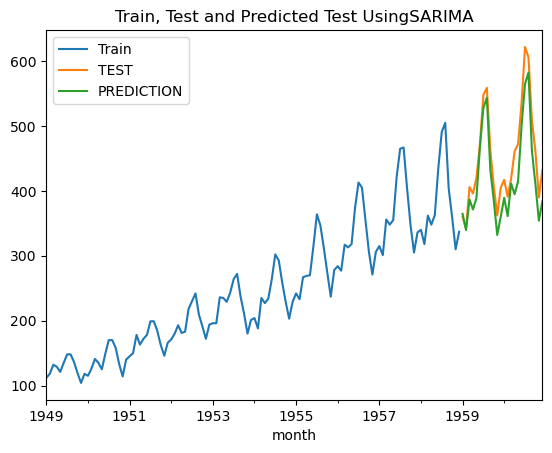

In [57]:
plot_prediction(y_pred, "SARIMA")

##### FINAL MODEL

In [76]:
tes_model = ExponentialSmoothing(df,
                                trend="add",
                                seasonal="add",
                                seasonal_periods=12).fit(smoothing_level=best_alpha,
                                                        smoothing_trend=best_beta,
                                                        smoothing_seasonal=best_gamma)
y_pred = tes_model.forecast(12)

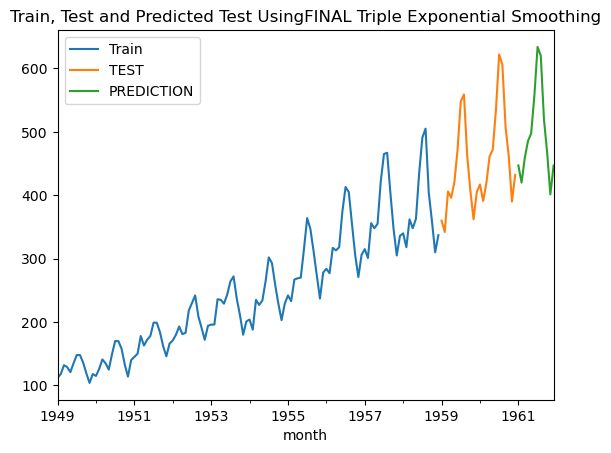

In [77]:
plot_prediction(y_pred, "FINAL Triple Exponential Smoothing")